1## Self-Study Colab Activity 7.2: Defining, Computing, and Optimizing Loss

**Expected Time = 60 Minutes**


This activity focuses on computing and minimizing the L2 loss for different values of theta and identifying the theta that minimizes the L2 loss.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

### The Dataset

The geyser data from seaborn is loaded below.  You are to  build a model using the waiting time to predict the geyser explosion duration.

Note that this model will not have an intercept term.  

In [ ]:
geyser = sns.load_dataset('geyser')

In [ ]:
geyser.head()

[Back to top](#Index:) 

## Problem 1

### Creating an array of $\theta$'s


Below, create an array of 100 equally spaced values between -1 and 1.  Use the `np.linspace` method demonstrated in the lectures and assigned your answer as a numpy array to `thetas` below.

In [ ]:


thetas = np.linspace(-1, 1, 100)

# Answer check
print(type(thetas))
print(thetas.shape)

[Back to top](#Index:) 

## Problem 2

### The Model



In this assignment, our model takes the form:

$$\text{duration} = \text{waiting} \times \theta$$

Multiply the values in the `waiting` column of the `geyser` dataset by `0.8` to create a prediction for the case of $\theta = 0.8$. Assign them as a Series to the variable `prediction` below.

In [ ]:


prediction = geyser['waiting'] * 0.8

# Answer check
print(type(prediction))
print(prediction.shape)

[Back to top](#Index:) 

## Problem 3

### Determining Mean Squared Error




Use the `mean_squared_error` function to calculate the MSE between the `duration` column of the `geyser` DataFrame and the `0.8*geyser['waiting']` data.

Use the function `float` to convert your result to floats. 

Assign your result as a float to `mse` below.

In [ ]:


mse = mean_squared_error(geyser['duration'], prediction)

# Answer check
print(type(mse))
print(mse)

[Back to top](#Index:) 

## Problem 4

### Computing the Mean Squared Error for `thetas`



Use a `for` loop over `thetas` to compute the MSE between the column `geyser['duration']` and the column `geyser['waiting']`multiplied by each value of `theta`.  Assign these values in order to the list `mses` below.

In [ ]:


mses = [mean_squared_error(geyser['duration'], geyser['waiting'] * theta) for theta in thetas]

# Answer check
print(type(mses))
print(len(mses))
print(mses[:10])

[Back to top](#Index:) 

## Problem 5

### Which $\theta$ minimizes Mean Squared Error



Using the list of `mses`, determine the value for $\theta$ that minimized the mean squared error.  You may want to amend your loop above to check for the smallest value as the loop proceeds.  Assign your answer as a float to `theta_min` below.

In [ ]:
theta_min = None
min_mse = None

for theta in thetas:
    mse = mean_squared_error(geyser['duration'], geyser['waiting'] * theta)
    if min_mse is None or mse < min_mse:
        min_mse = mse
        theta_min = theta

# Answer check
print(type(theta_min))
print(min_mse)
print(theta_min)

Note that, again, the shape of the Mean Squared Error is a parabola.  The plot below shows the values of thetas againt their mean squared error.  

<center>
    <img src = 'images/mse_min.png' >
</center>

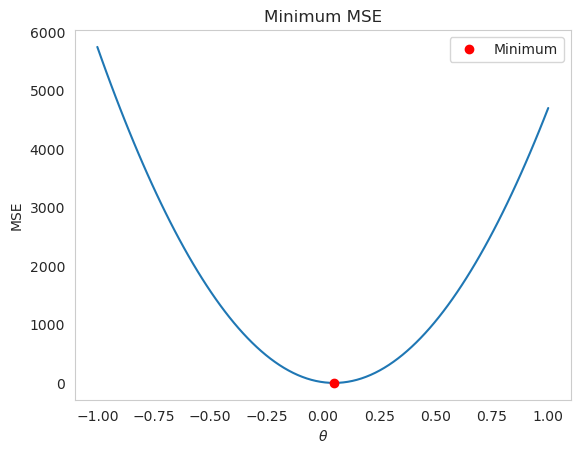

In [10]:
#Code for Plot
plt.plot(thetas, mses)
plt.plot(thetas[np.argmin(mses)], min(mses), 'ro', label='Minimum')
plt.legend()
plt.title('Minimum MSE')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
plt.grid();
# plt.savefig('images/mse_min.png')